# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 06:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 06:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [130]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [178]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [180]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [134]:
descent.step(X, y, 0) 

array([-0.004453  , -0.00491093, -0.00482656, -0.00496965, -0.00473936])

In [135]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [136]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [137]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [175]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

TypeError: __init__() got an unexpected keyword argument 'descent'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: 
* **StochasticDescent**:
* **MomentumDescent**:
* **Adagrad**:
* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# YOUR CODE:
data = pd.read_csv('autos.csv')
data["log_price"] = np.log1p(data["price"])
data = data.drop(columns = ['dateCreated', 'lastSeen','postalCode','price'])

In [156]:
X_train, X_test = train_test_split(
    data, test_size=0.4, random_state=42)
X_test, X_valid = train_test_split(
    X_test, test_size=0.5, random_state=42)
print('Train_size: ', X_train.shape)
print('Valid_size: ', X_valid.shape)
print('Test_size: ', X_test.shape)

Train_size:  (148723, 11)
Valid_size:  (49575, 11)
Test_size:  (49574, 11)


Посмотрим на распределение нашей целевой переменной от числовых признаков

In [157]:
X_train.groupby('powerPS',as_index=False).mean()

,powerPS,kilometer,yearOfRegistration,monthOfRegistration,log_price
0,1,71250.0,1994.75,8.0,7.404489
1,2,150000.0,2004.00,0.0,7.783641
2,3,150000.0,2005.00,5.0,8.294050
3,4,75000.0,2003.50,8.5,8.594255
4,5,143750.0,2001.50,5.5,7.459092
...,...,...,...,...,...
457,950,150000.0,2000.00,0.0,6.857514
458,952,70000.0,2003.00,5.0,8.160804
459,953,150000.0,2005.00,4.0,8.039480
460,998,150000.0,1993.00,6.0,5.442418


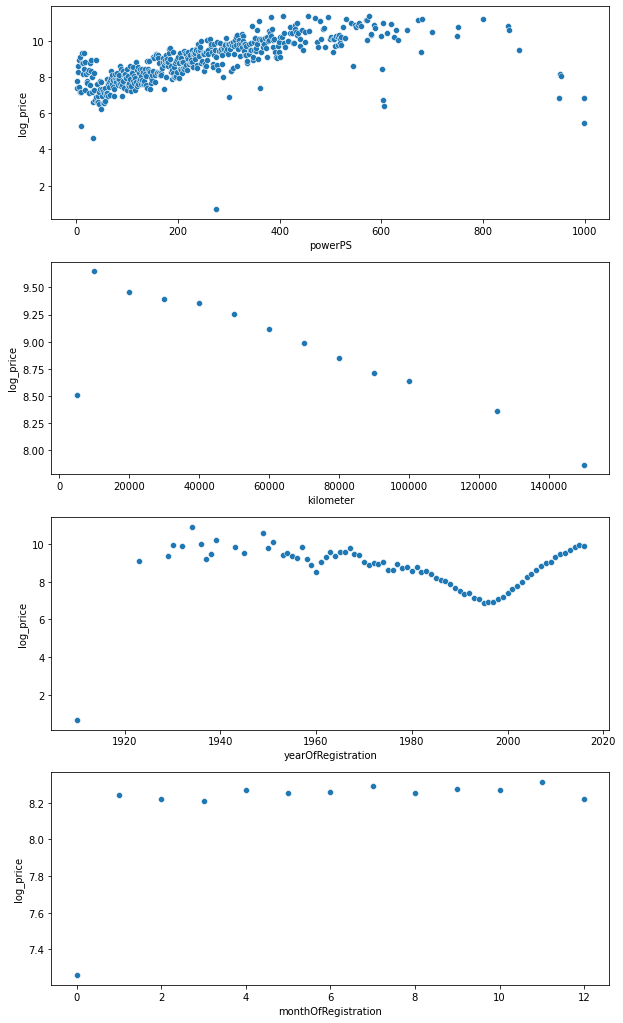

In [158]:
fig, axs = plt.subplots(4, figsize=(10, 18))
for i, col in enumerate(X_train[['powerPS', 'kilometer', 'yearOfRegistration', "monthOfRegistration"]]):
    sns.scatterplot(data=X_train.groupby(col,as_index=False).mean(), x=col, y='log_price', ax=axs[i])

Есть пару выбросов у старых машин, которые имеют большую стоймость. Посмотрим на распределения

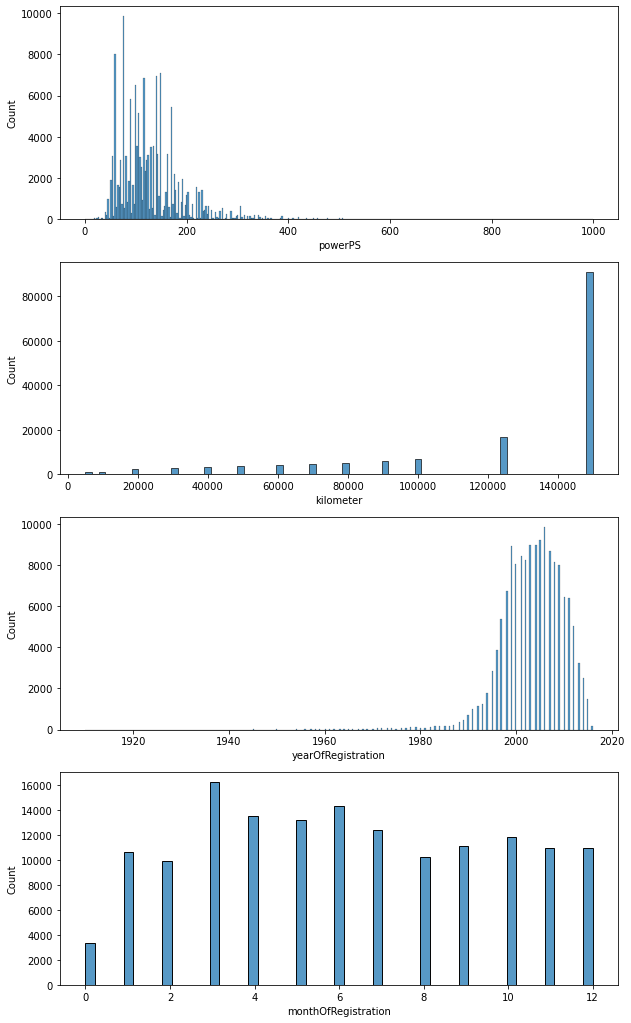

In [159]:
fig, axs = plt.subplots(4, figsize=(10, 18))
for i, col in enumerate(X_train[['powerPS','kilometer','yearOfRegistration',"monthOfRegistration"]]):
    sns.histplot(data=X_train, x=col,ax=axs[i] ) 

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import *
from sklearn.metrics import *

In [161]:
y_train = X_train.log_price
X_train = X_train.drop(columns='log_price')
y_test = X_test.log_price
X_test = X_test.drop(columns='log_price')
y_valid = X_valid.log_price
X_valid = X_valid.drop(columns='log_price')

In [162]:
descent_classes = [GradientDescent,
                   StochasticDescent, MomentumDescent, Adagrad, ]
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
numeric = X_train.select_dtypes([np.number]).columns
column_transform = ColumnTransformer(
    [('OHE', OneHotEncoder(handle_unknown="ignore"), categorical), ('SS', StandardScaler(), numeric)])
t_X_train = column_transform.fit_transform(X_train)
t_X_test = column_transform.transform(X_test)
t_X_valid = column_transform.transform(X_valid)

In [ ]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

In [185]:
X_train.shape,y_train.shape

((148723, 10), (148723,))

In [193]:
t_X_train.todense().shape

(148723, 311)

In [204]:
w0 = np.zeros(t_X_train.shape[1])

# YOUR CODE:

columns = ['eta', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
full_df = pd.DataFrame(columns=columns)
sg_df = pd.DataFrame(columns=columns)


for i in np.logspace(-2, 0, 7):
    print(i)
    # full gd

    gd_full=LinearRegression(descent = GradientDescent(lambda_=lambda_,w0=w0,eta=i), tolerance = tolerance,
    max_iter = max_iter)
    gd_full.fit(t_X_train, y_train)
    y_train_pred = gd_full.predict(t_X_train)
    y_pred = gd_full.predict(t_X_test)
    
    test_mse = mse(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    train_mse = mse(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[i],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    full_df = pd.concat([full_df, temp_test_df], ignore_index=True)
    
#     sg_full=LinearReg(eta=i, batch_size=10).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())
    
#     y_train_pred = sg_full.predict(X_train_scaled)
#     y_pred = sg_full.predict(X_test_scaled)
    
#     test_mse = mse(X_test['log_trip_duration'], y_pred)
#     test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
#     train_mse = mse(X_train['log_trip_duration'], y_train_pred)
#     train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
#     temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
#                             'test_mse': [test_mse],
#                        'test_r2': [-test_r2],
#                        'train_mse': [train_mse],
#                        'train_r2': [-train_r2]})
    
#     sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
# full_df

0.01


ValueError: operands could not be broadcast together with shapes (311,) (148723,) 

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [ ]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

# YOUR CODE:

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [ ]:
# YOUR CODE:

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.